In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  re

In [4]:
link = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## What is the shape of "movies.csv"?


In [7]:
movies.shape

(9742, 3)

## What is the shape of "ratings.csv"?

In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## How many unique "userId" are available in "ratings.csv"?


In [24]:
ratings['userId'].nunique()

610

In [37]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Which movie has recieved maximum number of user ratings?

In [42]:
df=pd.merge(movies,ratings,on="movieId")

In [47]:
df.groupby(['movieId','title'])['userId'].count().sort_values(ascending=False)

movieId  title                                 
356      Forrest Gump (1994)                       329
318      Shawshank Redemption, The (1994)          317
296      Pulp Fiction (1994)                       307
593      Silence of the Lambs, The (1991)          279
2571     Matrix, The (1999)                        278
                                                  ... 
4093     Cop (1988)                                  1
4089     Born in East L.A. (1987)                    1
58351    City of Men (Cidade dos Homens) (2007)      1
4083     Best Seller (1987)                          1
193609   Andrew Dice Clay: Dice Rules (1991)         1
Name: userId, Length: 9724, dtype: int64

## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [63]:
df=pd.merge(movies,tags,on="movieId")

In [66]:
df.loc[df['title']=='Matrix, The (1999)','tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [68]:
df=pd.merge(movies,ratings,on="movieId")

In [91]:
df[df['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

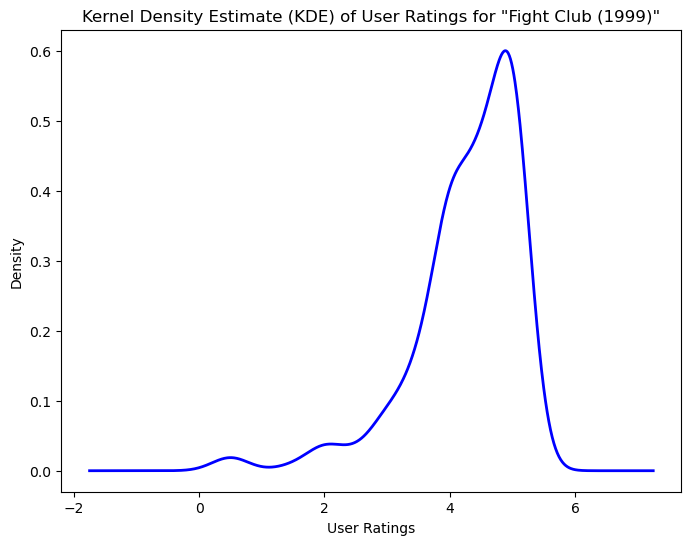

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'user_rating':list(df.loc[df['title']=='Fight Club (1999)','rating'])}
ratings_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ratings_df['user_rating'].plot(kind='kde', color='blue', linewidth=2)

plt.title('Kernel Density Estimate (KDE) of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')

plt.show()

#### Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

## Which movie is the most popular based on  average user ratings?

In [83]:
gf = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, gf, on='movieId', how='inner')
ft = merged[merged['count'] > 50]

In [84]:
ft.groupby('title')['mean'].max().sort_values(ascending=False).reset_index().iloc[0]

title    Shawshank Redemption, The (1994)
mean                             4.429022
Name: 0, dtype: object

## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [85]:
ft.groupby('title')['count'].max().sort_values(ascending=False).reset_index().head()

,title,count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
ft['sci']=ft['genres'].apply(lambda x:"".join(re.findall(r'Sci-Fi',x)))
s=ft[ft['sci']=='Sci-Fi'] 
s.groupby('title')['count'].max().sort_values(ascending=False).reset_index().iloc[2]

title    Jurassic Park (1993)
count                     238
Name: 2, dtype: object

In [92]:
import requests
import numpy as np
from bs4 import BeautifulSoup
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt%7Bnew_id%7D/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

## Mention the movieId of the movie which has the highest IMDB rating.

In [93]:
imdb_ratings=[]
for i in link['imdbId']:
    imdb_ratings.append(scrapper(i))

KeyboardInterrupt: 

In [ ]:
z